# Install

In [1]:
!pip install biodivine_aeon==1.3.0a3 -qq > /dev/null 2>&1
!pip install SPARQLWrapper networkx matplotlib -qq > /dev/null 2>&1
!apt-get install graphviz graphviz-dev -y -qq > /dev/null 2>&1
!pip install pygraphviz -qq > /dev/null 2>&1

# Import

In [2]:
from biodivine_aeon import *

In [3]:
from EnrichmentClasses import (EnrichmentPSBN)

In [4]:
from Visualization import (
    get_quickgo_terms_batch,
    set_nodes_for_graph,
    make_graph,
    visualize_subgraphs,
    get_roots_and_leafs,
    sort_roots_and_leafs,
    visualize_subgraphs_on_whole_net,
    print_roots_and_leafs_on_whole_net,
    visualize_subgraphs_on_each_instance,
    print_roots_and_leafs_per_instance,
    visualize_unmapped_nodes_frequencies,
    visualize_mapped_nodes_frequencies,
)

In [5]:
from Pipeline import pipeline

In [6]:
from CheckFixedPoints import print_fixed_points_on_new_stg

# Data + reference genome

In [7]:
network = BooleanNetwork.from_file("interferon(virus_true_drugs_all).aeon")

In [8]:
human_id = "9606"

# Case study

In [9]:
psbn = EnrichmentPSBN([])
pipeline(psbn, network, human_id, "interferon")

Number or instances and number of attractors

In [10]:
print(f"Number of instances: {len(psbn.instances)}")
print(f"Number of attractors: {psbn.count_attractors()}")

Number of instances: 32
Number of attractors: 48


## Unmapped ids

Unmapped ids includes besides others even phenotypes - output nodes of pathway - such as Immune_Response_phenotype, Inflammation_phenotype. When some of them occures it means that it is the cell fate of that attractor.

I restricted visualization only to output nodes.
full version is avaiable under method:
***psbn.print_unmapped_ids_per_instance_per_attractor()***

In [11]:
output_nodes = {"Immune_Response_phenotype", "Inflammation_phenotype"}

In [12]:
psbn.print_only_output_unmapped_ids_per_instance_per_attractor(output_nodes)

0: ColorModel({'NFKB1_cell': 'false', 'Azithromycin_drug': 'false', 'GRL0617_drug': 'false', 'PAMP_signalling_phenotype': 'false', 'TREML4': 'false'})
['Inflammation_phenotype'] [0]
---------
1: ColorModel({'NFKB1_cell': 'false', 'Azithromycin_drug': 'true', 'GRL0617_drug': 'false', 'PAMP_signalling_phenotype': 'false', 'TREML4': 'false'})
['Inflammation_phenotype'] [0]
---------
2: ColorModel({'NFKB1_cell': 'false', 'Azithromycin_drug': 'false', 'GRL0617_drug': 'true', 'PAMP_signalling_phenotype': 'false', 'TREML4': 'false'})
['Inflammation_phenotype'] [0]
['Immune_Response_phenotype', 'Inflammation_phenotype'] [1]
---------
3: ColorModel({'NFKB1_cell': 'false', 'Azithromycin_drug': 'true', 'GRL0617_drug': 'true', 'PAMP_signalling_phenotype': 'false', 'TREML4': 'false'})
['Immune_Response_phenotype', 'Inflammation_phenotype'] [0]
['Inflammation_phenotype'] [1]
---------
4: ColorModel({'NFKB1_cell': 'true', 'Azithromycin_drug': 'false', 'GRL0617_drug': 'false', 'PAMP_signalling_phenoty

We can also see output nodes frequenies per each instance

In [13]:
for i, instance in enumerate(psbn.instances):
  unmapped_ids_freqs = instance.count_unmapped_ids_frequencies()
  output_unmapped_ids_freqs = {node: frequency
                             for node, frequency in unmapped_ids_freqs.items()
                             if node in output_nodes}
  print(f"[{i}] {instance.color}:\nNumber of attractors: {len(instance.attractors)}\n{output_unmapped_ids_freqs}\n---------")

[0] ColorModel({'NFKB1_cell': 'false', 'Azithromycin_drug': 'false', 'GRL0617_drug': 'false', 'PAMP_signalling_phenotype': 'false', 'TREML4': 'false'}):
Number of attractors: 1
{'Inflammation_phenotype': 1}
---------
[1] ColorModel({'NFKB1_cell': 'false', 'Azithromycin_drug': 'true', 'GRL0617_drug': 'false', 'PAMP_signalling_phenotype': 'false', 'TREML4': 'false'}):
Number of attractors: 1
{'Inflammation_phenotype': 1}
---------
[2] ColorModel({'NFKB1_cell': 'false', 'Azithromycin_drug': 'false', 'GRL0617_drug': 'true', 'PAMP_signalling_phenotype': 'false', 'TREML4': 'false'}):
Number of attractors: 2
{'Inflammation_phenotype': 2, 'Immune_Response_phenotype': 1}
---------
[3] ColorModel({'NFKB1_cell': 'false', 'Azithromycin_drug': 'true', 'GRL0617_drug': 'true', 'PAMP_signalling_phenotype': 'false', 'TREML4': 'false'}):
Number of attractors: 2
{'Immune_Response_phenotype': 1, 'Inflammation_phenotype': 2}
---------
[4] ColorModel({'NFKB1_cell': 'true', 'Azithromycin_drug': 'false', 'GRL

We can see frequencies of the output nodes across all instances

In [14]:
print(f"Total numbers of attractors: {psbn.count_attractors()}")
unmapped_ids_freqs = psbn.count_unmapped_ids_frequencies_in_all_instances()
output_unmapped_ids_freqs = {node: frequency
                             for node, frequency in unmapped_ids_freqs.items()
                             if node in output_nodes}
output_unmapped_ids_freqs

Total numbers of attractors: 48


{'Inflammation_phenotype': 48, 'Immune_Response_phenotype': 16}

There is output node (unmapped id) present in every attractor across instances (and many others - especially virus proteins)

In [15]:
psbn.unmapped_ids_intersection_on_all_instances()

{'AP_1_complex_cell',
 'E',
 'IFNAR_complex',
 'Inflammation_phenotype',
 'M',
 'N',
 'NFKBIA_NFKB1_component',
 'NLRP3_inflammasome_complex',
 'Nsp13',
 'Nsp15',
 'Orf6',
 'Orf8_complex',
 'Orf9b',
 'Viral_dsRNA_rna_reduced',
 'pp1ab'}

Intersection of unmapped ids on each instance - there is apoptosis and growth_arrest output node (part of unmapped ids) in every of attractor of most instances

In [16]:
for instance in psbn.instances:
  formatted = "{" + ", ".join(sorted(instance.unmapped_ids_intersection())) + "}"
  print(formatted)

{AP_1_complex_cell, AP_1_complex_nucleus, E, IFNAR_complex, Inflammation_phenotype, M, N, NFKBIA_NFKB1_component, NLRP3_inflammasome_complex, Nsp13, Nsp15, Orf6, Orf8_complex, Orf9b, Viral_dsRNA_rna_reduced, pp1ab}
{AP_1_complex_cell, Azithromycin_drug, E, IFNAR_complex, Inflammation_phenotype, M, N, NFKBIA_NFKB1_component, NLRP3_inflammasome_complex, Nsp13, Nsp15, Orf6, Orf8_complex, Orf9b, Viral_dsRNA_rna_reduced, pp1ab}
{AP_1_complex_cell, AP_1_complex_nucleus, E, GRL0617_drug, IFNAR_complex, Inflammation_phenotype, M, N, NFKBIA_NFKB1_component, NLRP3_inflammasome_complex, Nsp13, Nsp15, Orf6, Orf8_complex, Orf9b, Viral_dsRNA_rna_reduced, pp1ab}
{AP_1_complex_cell, Azithromycin_drug, E, GRL0617_drug, IFNAR_complex, Inflammation_phenotype, M, N, NFKBIA_NFKB1_component, NLRP3_inflammasome_complex, Nsp13, Nsp15, Orf6, Orf8_complex, Orf9b, Viral_dsRNA_rna_reduced, pp1ab}
{AP_1_complex_cell, AP_1_complex_nucleus, E, IFNAR_complex, Inflammation_phenotype, M, N, NFKB1_nucleus, NFKBIA_NFKB1_

## Terms frequencies

These are 10 the most frequent GO terms counted on each attractor of the PSBN (restricted to 10, there is 340 of them)

In [17]:
frequencies = psbn.count_goterms_frequencies_in_all_instances()
sorted_frequences = sorted(frequencies.items(), key=lambda item: item[1], reverse=True)
print(f"In total number of attractors: {psbn.count_attractors()}, 10 most frequent terms are:")
for term, frequency in sorted_frequences[:10]:
  print(f"{term}: {frequency}")

In total number of attractors: 48, 10 most frequent terms are:
+response to virus: 48
+biological process involved in interspecies interaction between organisms: 48
+response to other organism: 48
+response to external biotic stimulus: 48
+response to biotic stimulus: 48
+defense response: 48
+response to external stimulus: 48
+defense response to virus: 48
+intracellular signal transduction: 48
+response to stress: 48


## Graphs

To visualize a graph I need to:

1.   compute an intersection of GO terms on whole net
2.   set a graph structure on it (assign parent and child relationships between them)
3.   get roots and leafs of graph sorted by FDR (false discovery rate)
4.   make subgraphs of graph per each root



I restricted visualization of graphs on whole network only to the first 5 subgraphs as an examples.

Full results available under method:
***visualize_subgraphs_on_whole_net(psbn)***

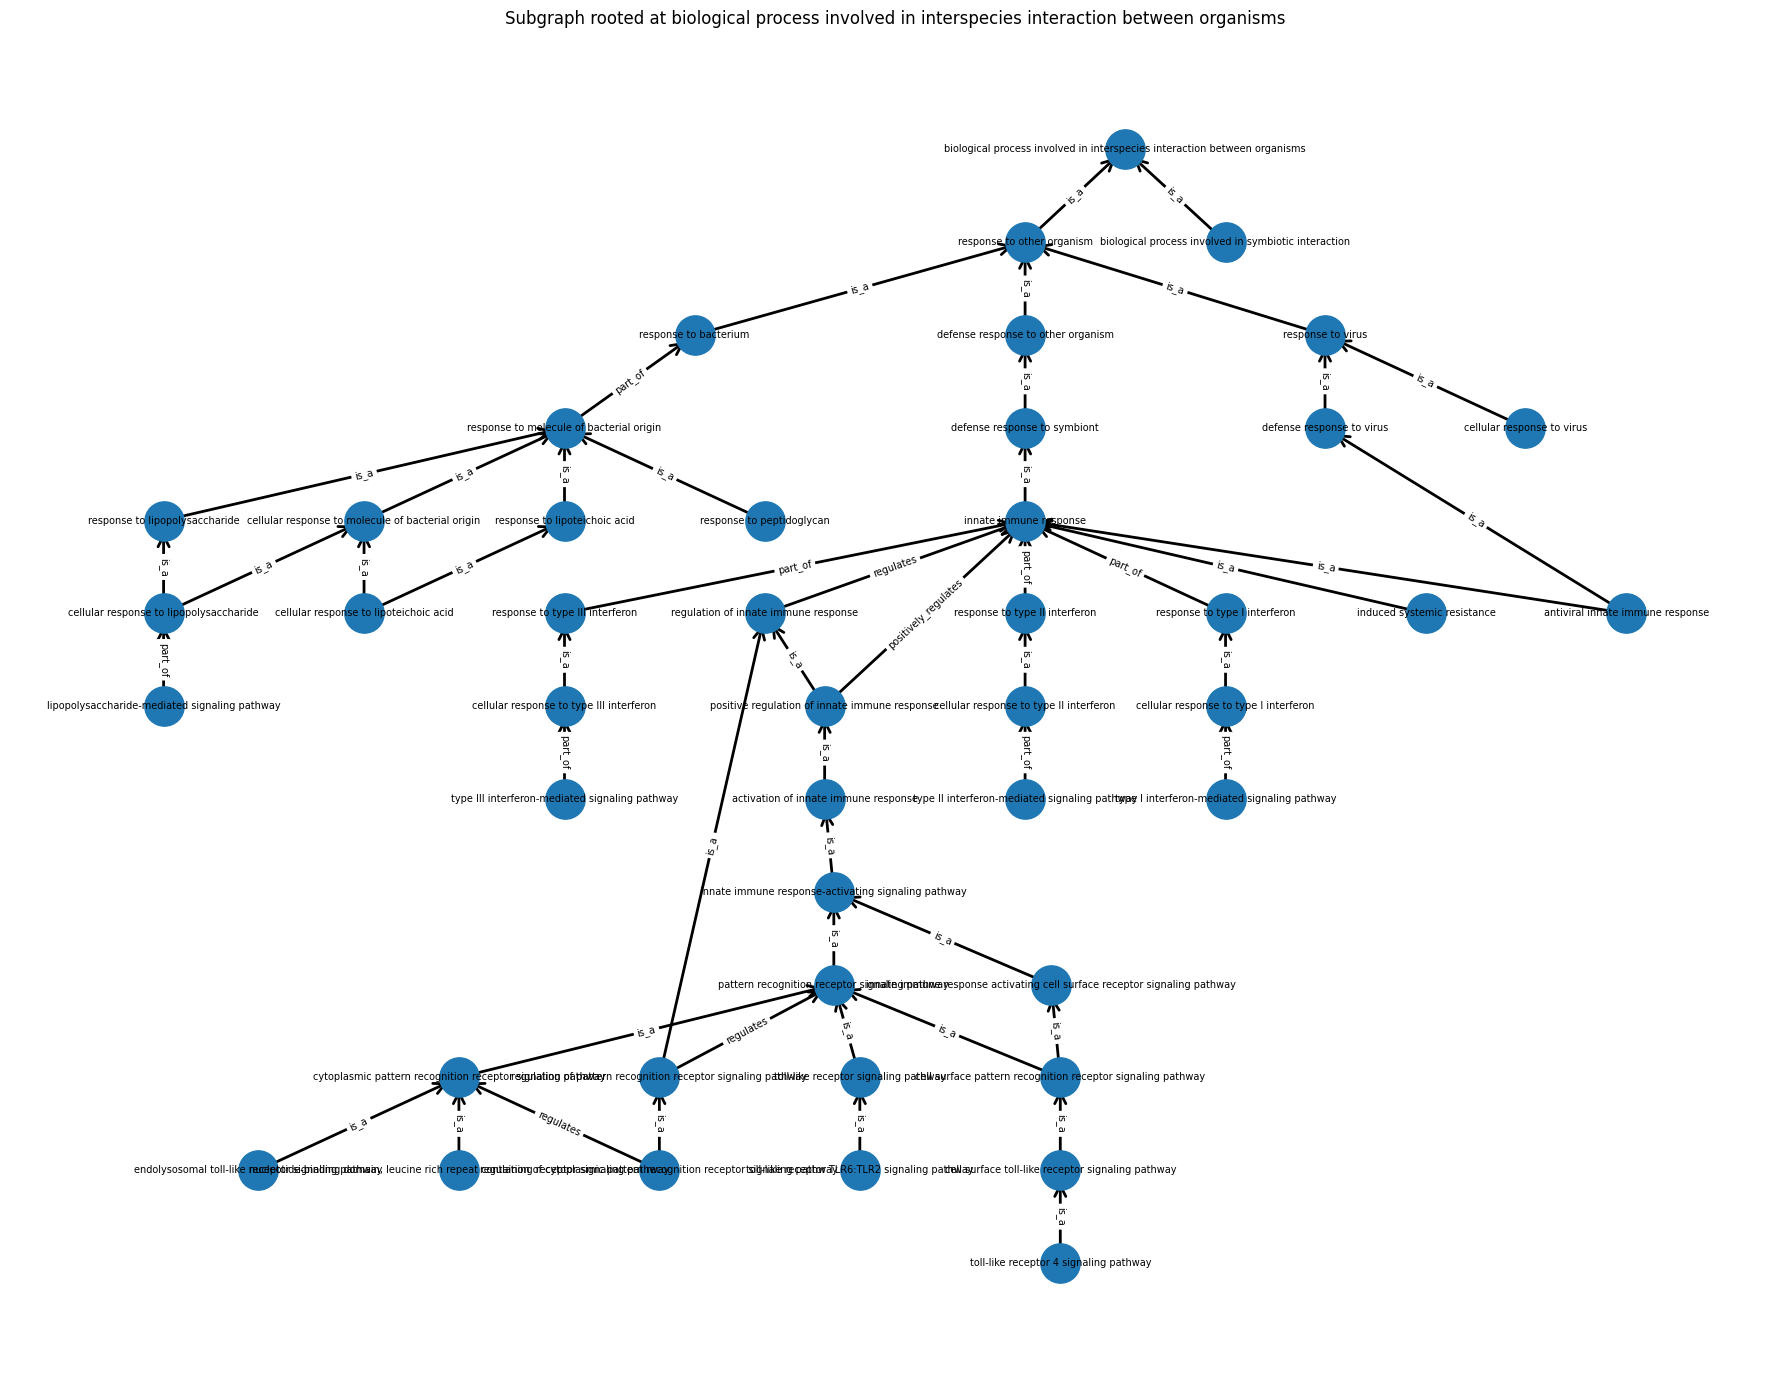

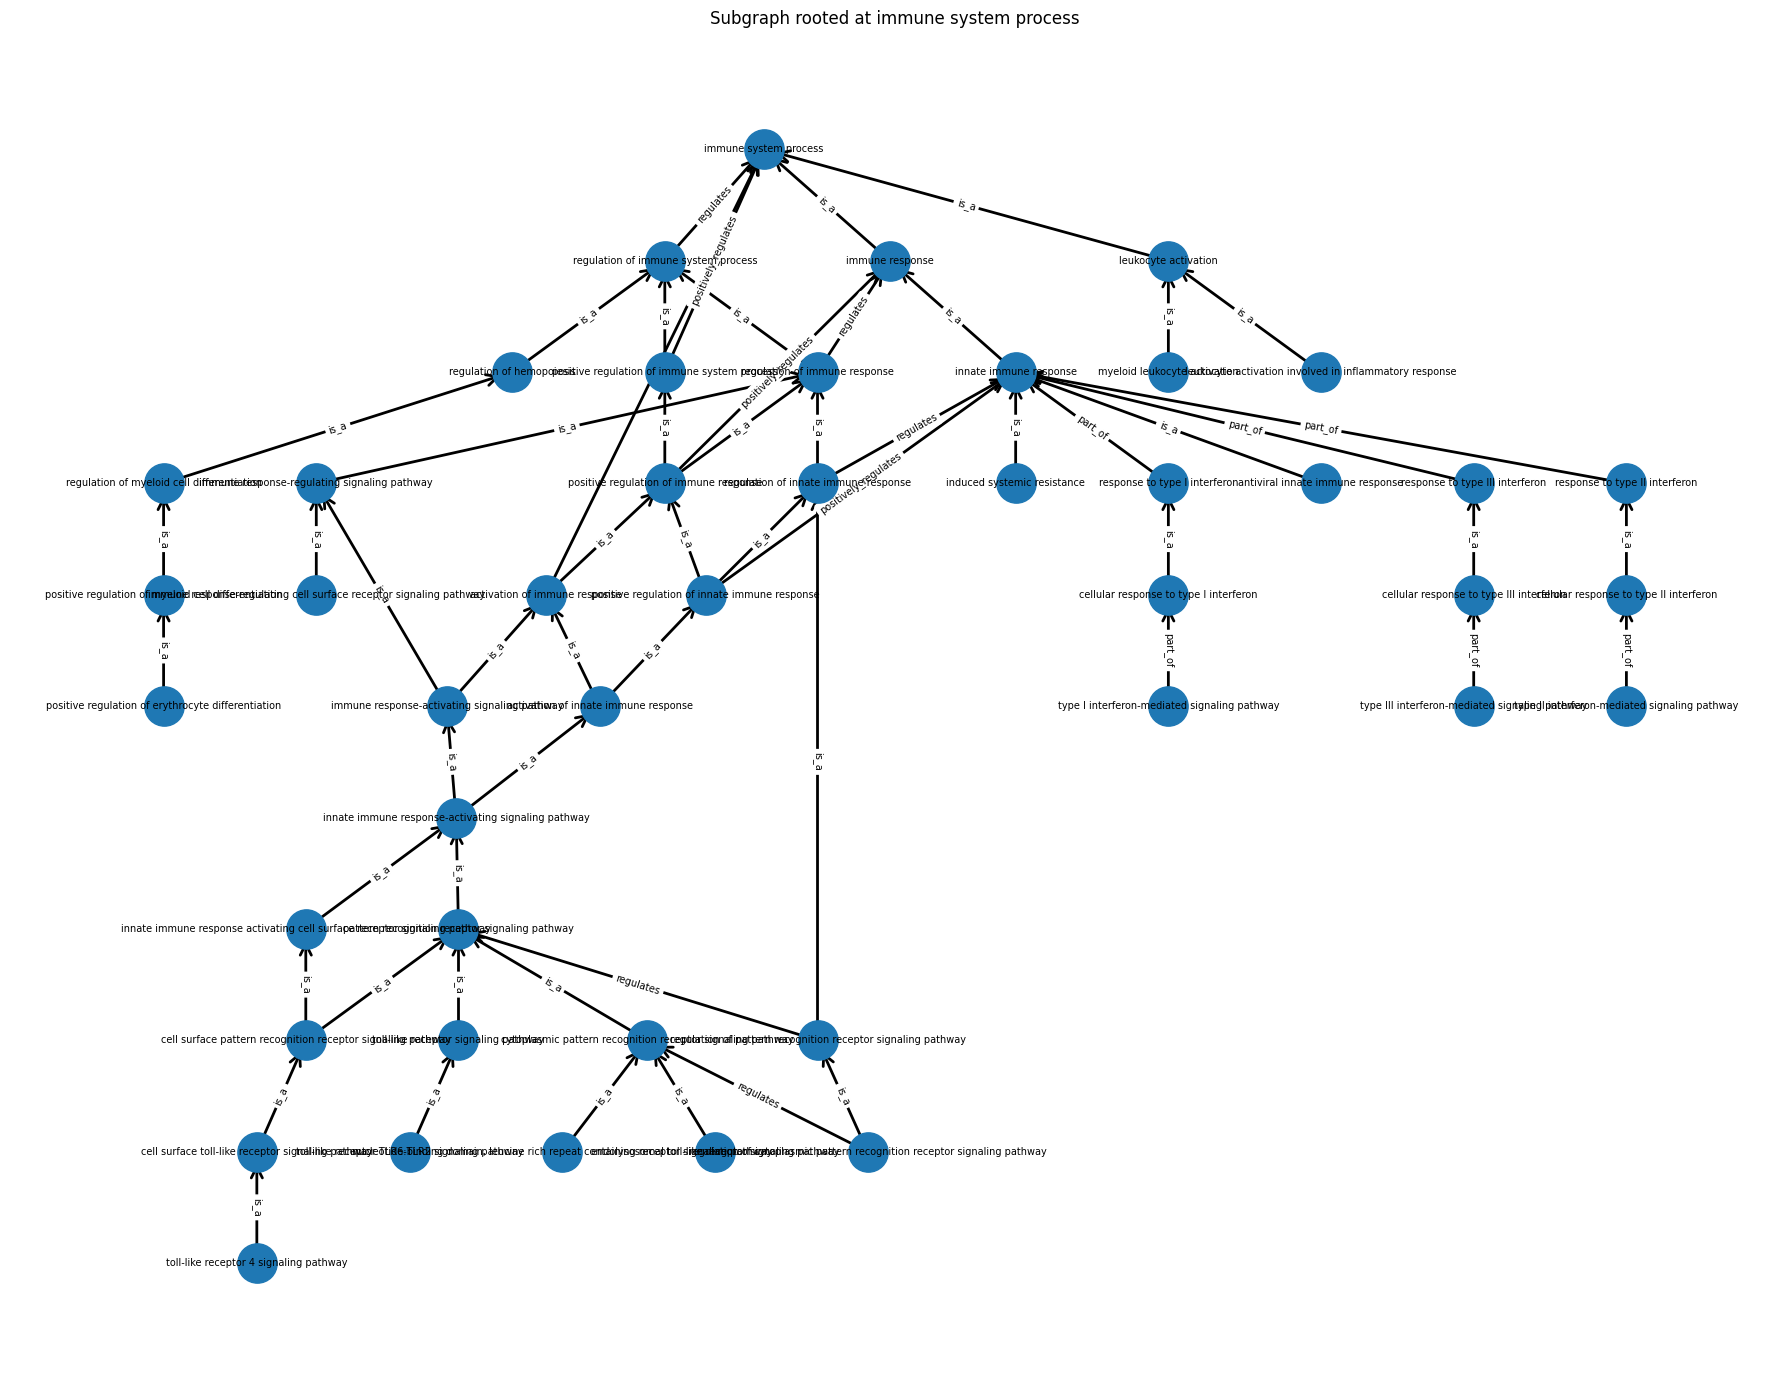

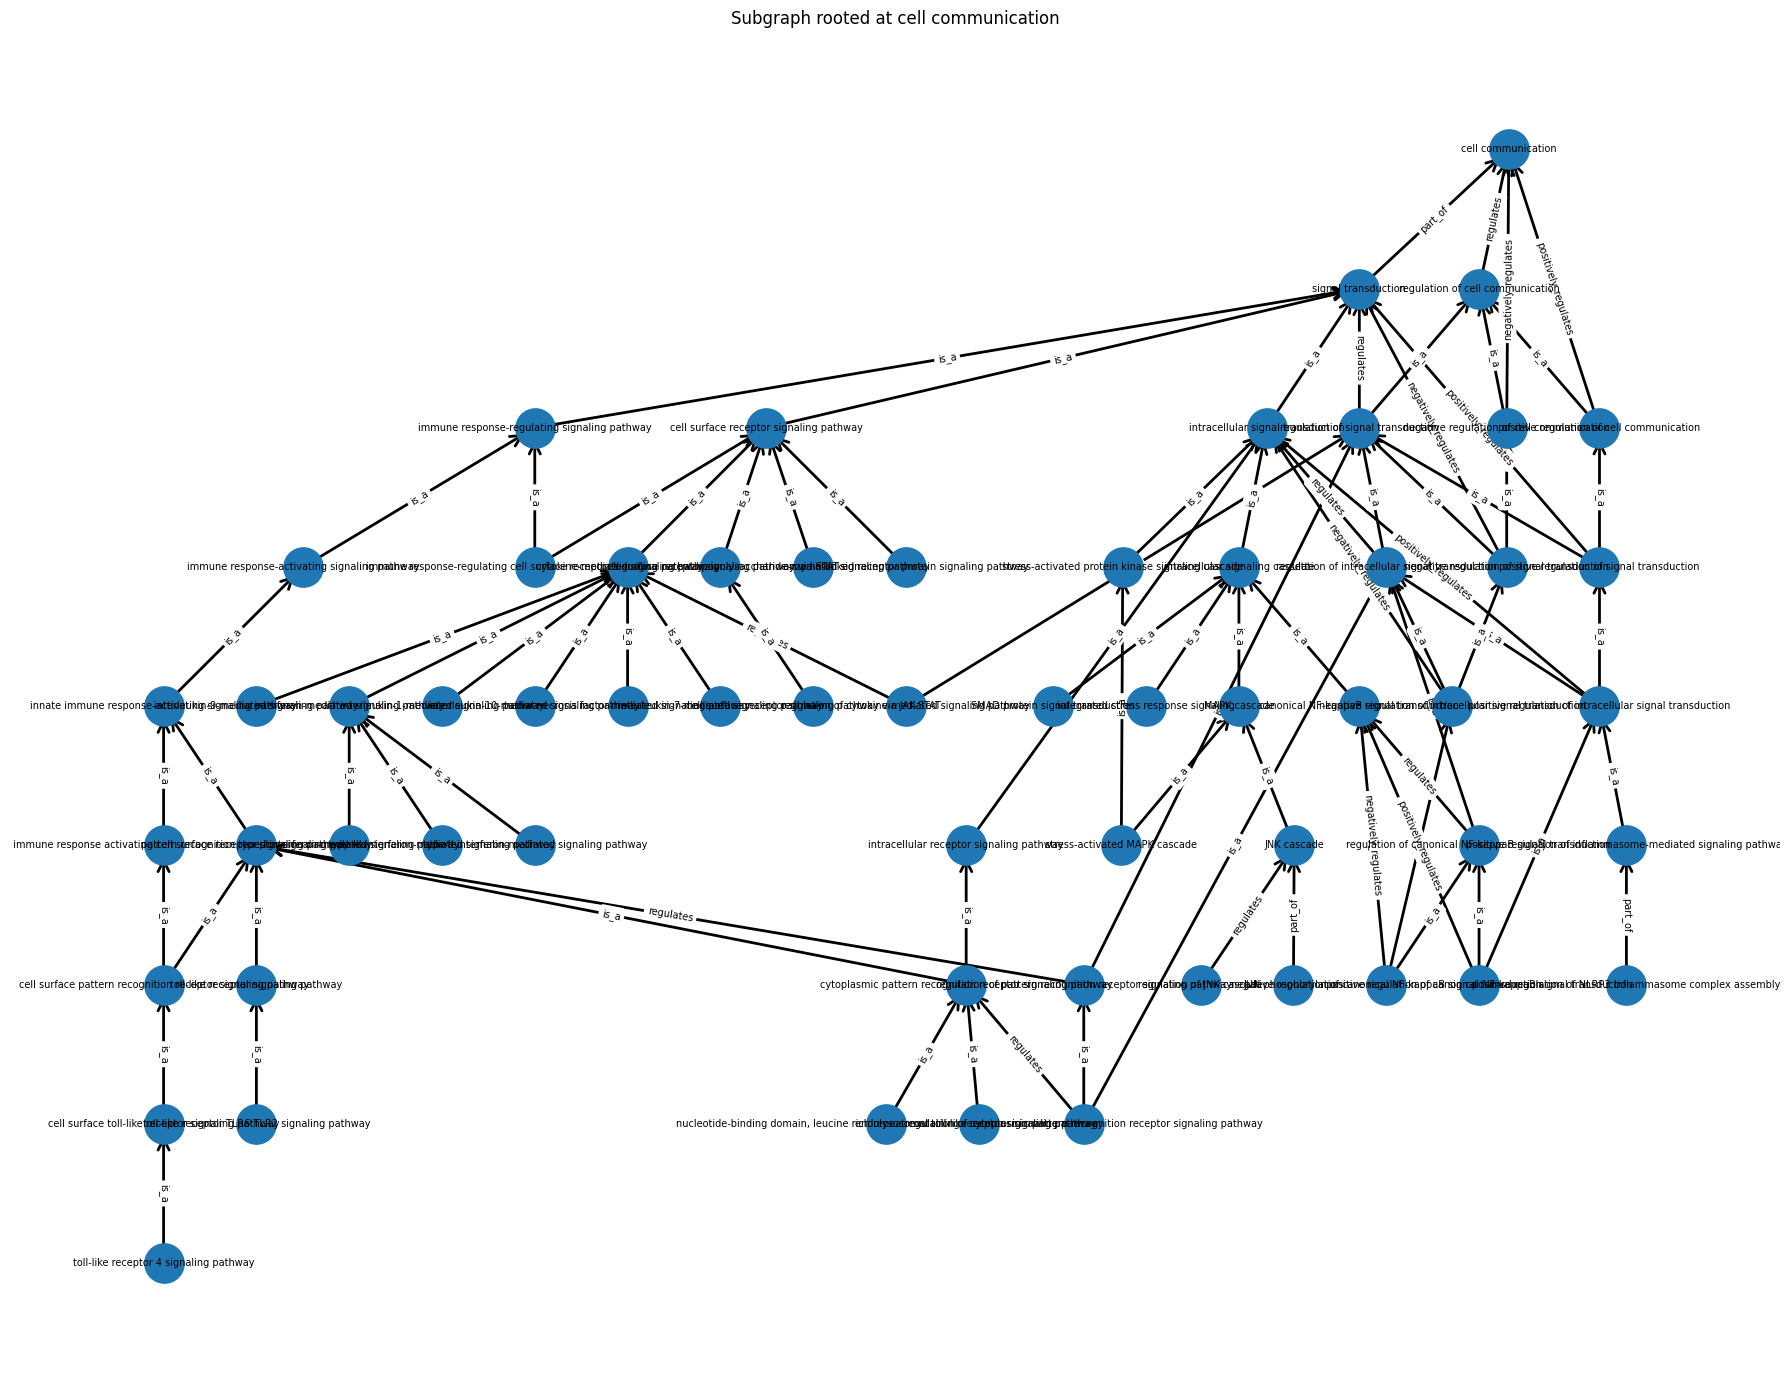

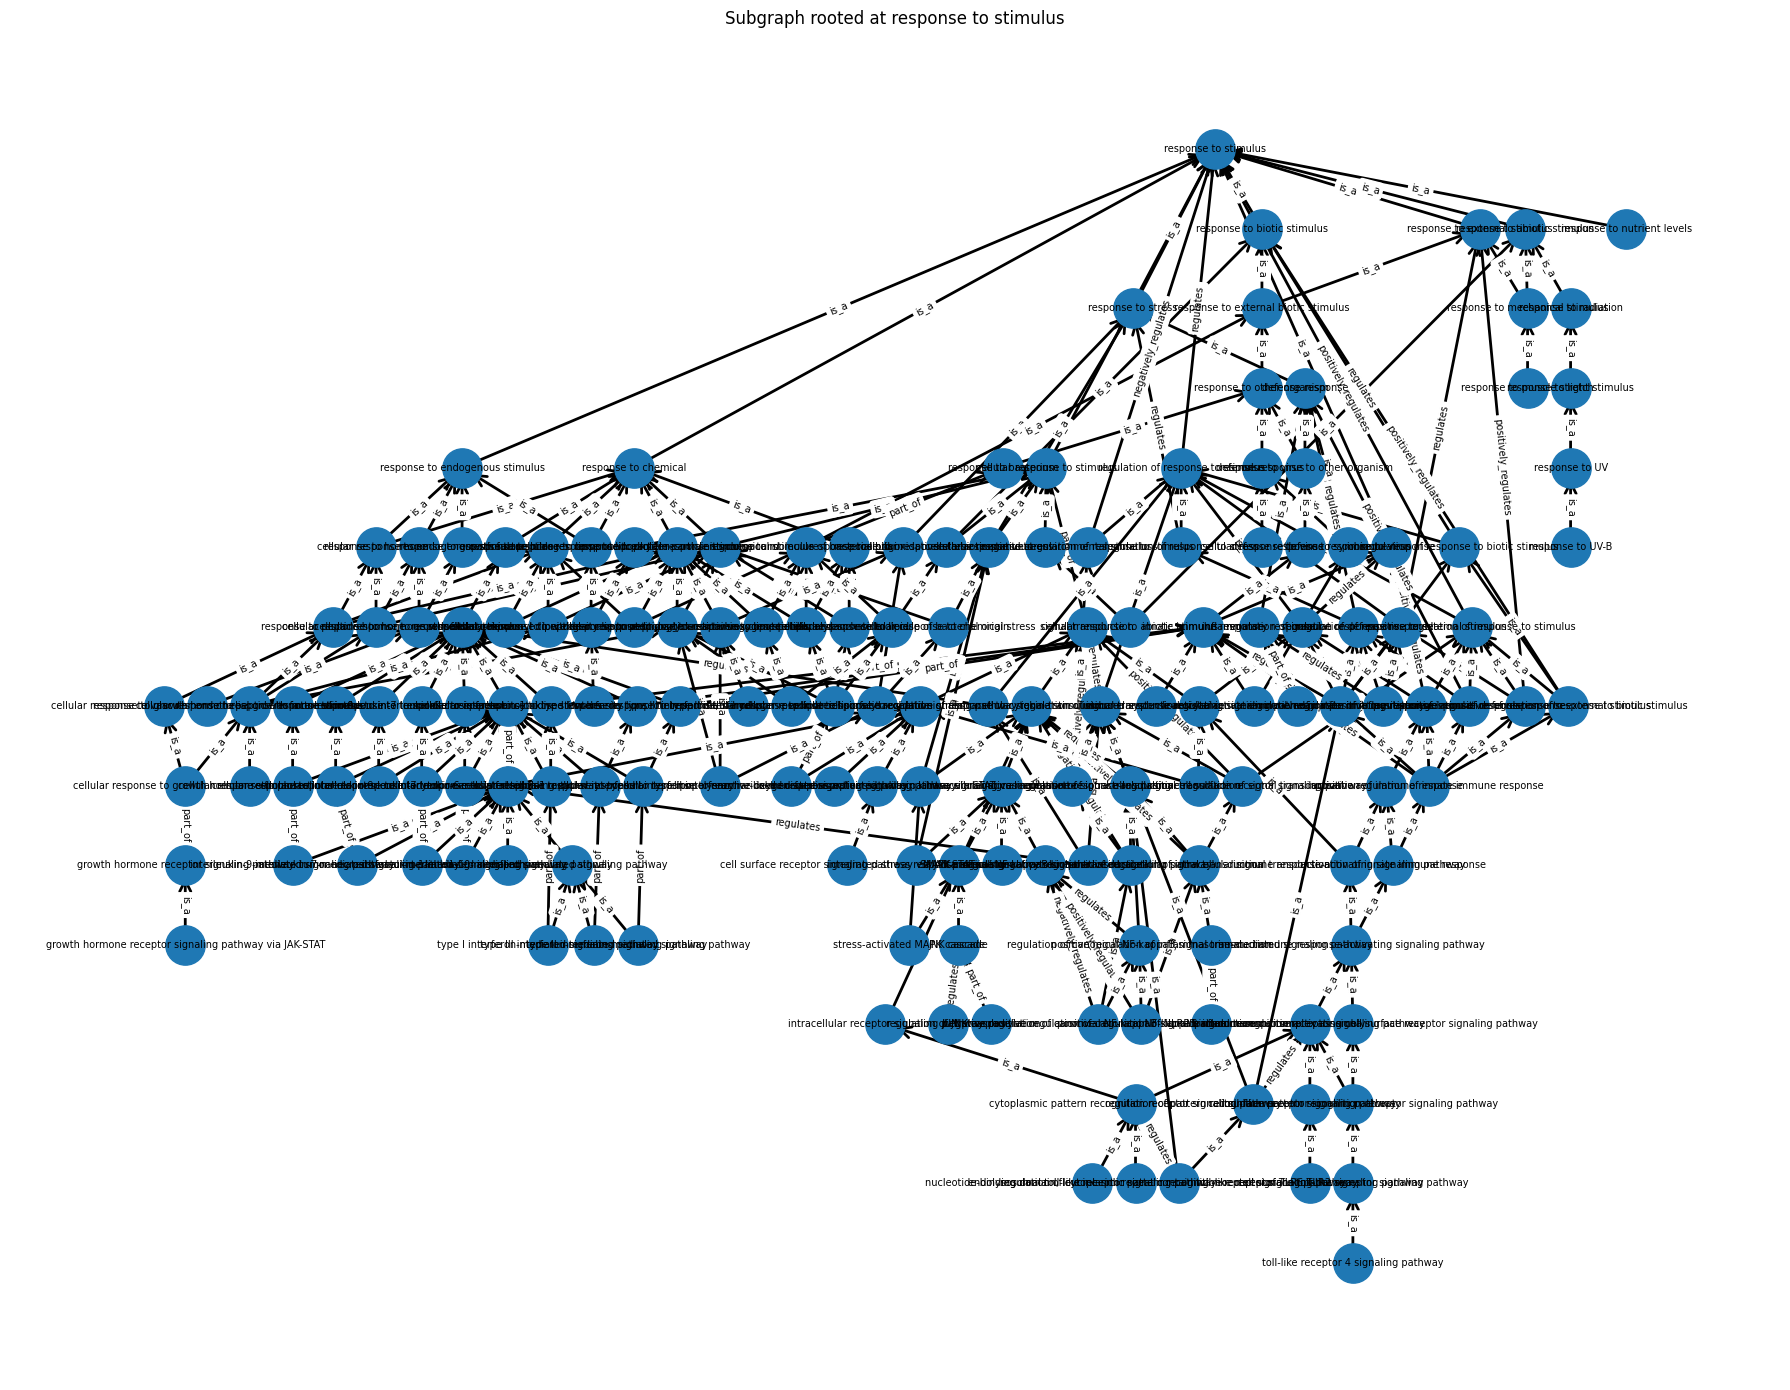

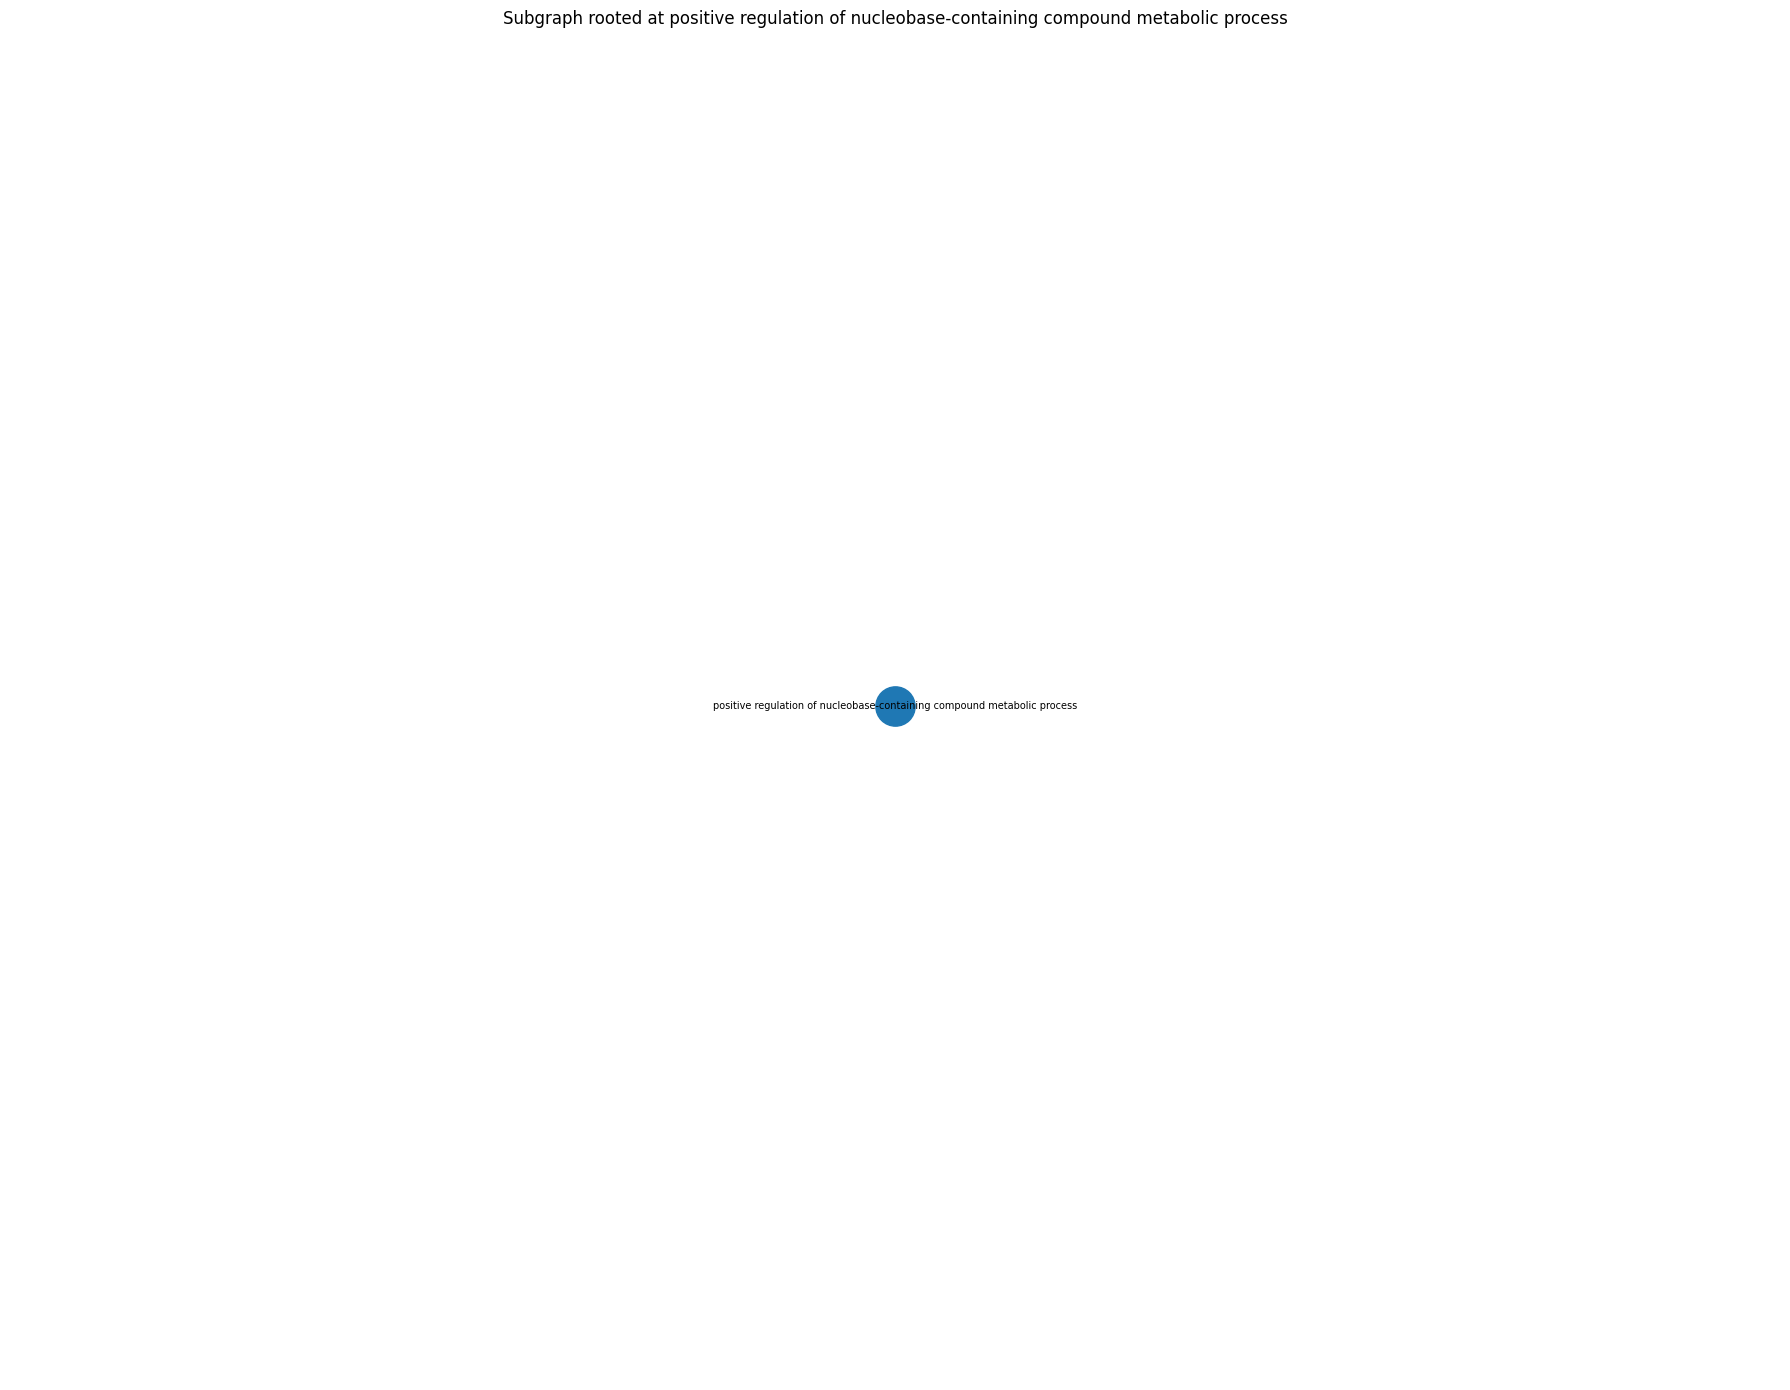

In [18]:
intersected_goterms = psbn.goterms_intersection_on_all_instances()
set_nodes_for_graph(intersected_goterms)

roots, leafs = get_roots_and_leafs(intersected_goterms)
sorted_roots, sorted_leafs = sort_roots_and_leafs(roots, leafs)

G = make_graph(intersected_goterms)
visualize_subgraphs(G, sorted_roots[:5], intersected_goterms)

Since we have not empty and relatively big intersection acros all instances we can operate on whole psbn level not only instace level. We ommit visualising bunches of graphs per instance, and so for roots and leafs available under functions:
***visualize_subgraphs_on_each_instance(psbn)***
and
***print_roots_and_leafs_per_instance(psbn)***

## Roots and leafs

These are numbers of roots and leafs on whole psbn.
Roots are the most general terms (biological processes) of subgpraphs and leafs are potentially the most concrete terms(biological processes) of subgraphs.

I restricted visualizing it to only the first few roots and leafs.
Full version is available under the function: ***print_roots_and_leafs_on_whole_net(psbn)***

In [19]:
print(f"{len(sorted_leafs)} leaves, first few: {sorted_leafs[:3]}")
print(f"{len(sorted_roots)} roots, first few: {sorted_roots[:5]}")

84 leaves, first few: [+type I interferon-mediated signaling pathway, +positive regulation of canonical NF-kappaB signal transduction, +tumor necrosis factor-mediated signaling pathway]
29 roots, first few: [+biological process involved in interspecies interaction between organisms, +immune system process, +cell communication, +response to stimulus, +positive regulation of nucleobase-containing compound metabolic process]


## Correlations

In [20]:
for i, instance in enumerate(psbn.instances):
  print(f"[{i}] {instance.color}")
  for attractor in instance.attractors:
    formatted = "{" + ", ".join(sorted(attractor.enriched_nodes)) + "}"
    print(formatted)
  print("---------")

[0] ColorModel({'NFKB1_cell': 'false', 'Azithromycin_drug': 'false', 'GRL0617_drug': 'false', 'PAMP_signalling_phenotype': 'false', 'TREML4': 'false'})
{AP_1_complex_cell, AP_1_complex_nucleus, E, FOS, IFNAR_complex, IRF9, ITCH, Inflammation_phenotype, JAK1, JUN, M, MAPK14, MAPK8, MYD88, N, NFKBIA_NFKB1_component, NLRP3_inflammasome_complex, Nsp13, Nsp15, Nsp3, Orf6, Orf8_complex, Orf9b, RELA, RIPK1, RNF135, STAT1, STAT2, TANK, TCAM1, TRIM25, TYK2, Viral_dsRNA_rna_reduced, pp1ab}
---------
[1] ColorModel({'NFKB1_cell': 'false', 'Azithromycin_drug': 'true', 'GRL0617_drug': 'false', 'PAMP_signalling_phenotype': 'false', 'TREML4': 'false'})
{AP_1_complex_cell, Azithromycin_drug, E, FOS, IFNAR_complex, IRF9, ITCH, Inflammation_phenotype, JAK1, JUN, M, MAPK14, MAPK8, MYD88, N, NFKBIA_NFKB1_component, NLRP3_inflammasome_complex, Nsp13, Nsp15, Nsp3, Orf6, Orf8_complex, Orf9b, RELA, RIPK1, RNF135, STAT1, STAT2, TANK, TCAM1, TRIM25, TYK2, Viral_dsRNA_rna_reduced, pp1ab}
---------
[2] ColorModel

## Fixed points

In [21]:
print_fixed_points_on_new_stg(network)

Total colors: 32
------
Total colored fixed points: 48
Total fixed point states: 36
Total fixed point colors: 32
------
Fixed point vertices turned on projection (across all colors):
{AP_1_complex_cell, Azithromycin_drug, E, FOS, IFNAR_complex, IRF9, ITCH, Inflammation_phenotype, JAK1, JUN, M, MAPK14, MAPK8, MYD88, N, NFKBIA_NFKB1_component, NLRP3_inflammasome_complex, Nsp13, Nsp15, Nsp3, Orf6, Orf8_complex, Orf9b, RELA, RIPK1, RNF135, STAT1, STAT2, TANK, TCAM1, TRIM25, TYK2, Viral_dsRNA_rna_reduced, pp1ab}
{AP_1_complex_cell, Azithromycin_drug, E, FOS, IFNAR_complex, IRF9, ITCH, Inflammation_phenotype, JAK1, JUN, M, MAPK14, MAPK8, MYD88, MYD88_TCAM1_complex, N, NFKBIA_NFKB1_component, NLRP3_inflammasome_complex, Nsp13, Nsp15, Nsp3, Orf6, Orf8_complex, Orf9b, RELA, RIPK1, RNF135, STAT1, STAT2, TANK, TCAM1, TREML4, TRIM25, TYK2, Viral_dsRNA_rna_reduced, pp1ab}
{AP_1_complex_cell, Azithromycin_drug, E, FOS, IFNAR_complex, IRF9, ITCH, Inflammation_phenotype, JAK1, JUN, M, MAPK14, MAPK8, M